<a href="https://colab.research.google.com/github/imrun10/Genetic_Algorithm/blob/main/Genetic_Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

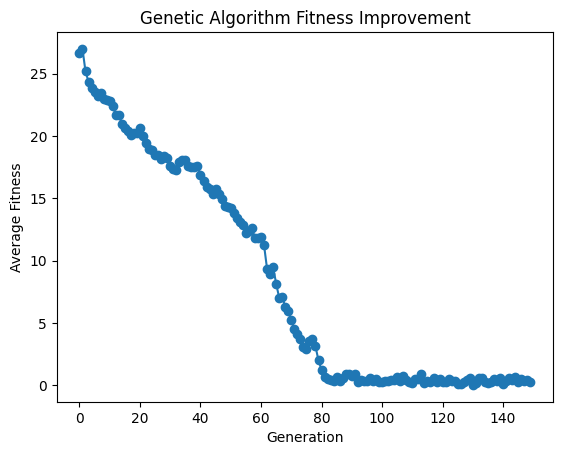

Best set of parameters: (1.0285585253073168, 0.6923356896793922, 0.7398946888428207, 1.3133742040992806, 2.3674589326874567, 0.7944813219604204)
𝒚′ = 44.08156890450664


In [ ]:
import random
import matplotlib.pyplot as plt


target  = 44.1

features = [4,2,7,5,11,1]

populationSize = 10

mutGene = 0.1
def generate_population(population_size):
    return [(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1),   # This essentially will create a list of tuples with random weightings,
             random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1))
             for gene in range(population_size)]    #the for loops just repeats it the population size


def calc_Fitness(chromosome): # to calculate the fitness this basically will return how close it is to the error
  target  = 44.1

  features = [4,2,7,5,11,1]
  value = 0
  for i in range(0,len(features)): # basically does w1x +w2x... to get the value
    value += features[i]*chromosome[i]
  return abs(value-target) #gets the crit error value or fitness




def select_parents(population):
  return random.choices(population, weights=[1 / (calc_Fitness(individual) +1) for individual in population], k=2)  #random.choices(sequence, weights=None, cum_weights=None, k=1)


def crossOver(p1,p2,features):
  crossover_point = random.randint(1, len(features)-1) # where it should cut the genese is chosen at random
  child1 = p1[:crossover_point] + p1[crossover_point:]
  child2 = p2[:crossover_point] + p2[crossover_point:] # it gets the two child chromosomes that is split at random points

  return child1, child2


def mutate(chromosome,mutGene):
  #basically just updates each gene by a random amount to introduce mutation
  return tuple(gene + random.uniform(mutGene, -mutGene) for gene in chromosome)


def calcY(chromosome, features): # to calculate the fitness this basically will return how close it is to the error
  value = 0
  for i in range(0,len(features)): # basically does w1x +w2x... to get the value
    value += features[i]*chromosome[i]
  return value



def mutationAlgo(target,features,mutGene,populationSize,generations):

  fitnessHistory=[]
  #Step 1 create a population

  population = generate_population(populationSize)


  #Step 2 go through the main loop of the generations

  for i in range(generations):
    population = sorted(population, key=calc_Fitness) #arrange the population in terms of which have the highest fitness
    best = population[0]

    #check if the fitness is perfect or -
    if calc_Fitness(best) == 0:
      print(f"best found {best} in {i} generations")
      break #end the loop cause we found the best

    #else
    parents = select_parents(population) #randomises the list based on the calc error as weighting
    child1, child2 = crossOver(parents[0], parents[1],features) # gets the new children
    #since it already in order from the most accurate. it goes to the bottom 2 that is not accurate and replace with children but with a random mutation
    population[-2] = mutate(child1,mutGene)
    population[-1] = mutate(child2, mutGene)

    #get the average fitness in order to graph it

    avg_fitness = sum(calc_Fitness(ind) for ind in population) / populationSize
    fitnessHistory.append(avg_fitness)
  plt.plot(range(generations), fitnessHistory, marker='o', linestyle='-')
  plt.title("Genetic Algorithm Fitness Improvement")
  plt.xlabel("Generation")
  plt.ylabel("Average Fitness")
  plt.show()

  return population[0]

result = mutationAlgo(target,features,mutGene, 4, 150)
best_y_prime = calcY(result,features)
print("Best set of parameters:", result)
print("𝒚′ =", best_y_prime)